<a href="https://colab.research.google.com/github/Sonalpriya-pixel/data-science-portfolio/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print("All modules uploaded")


All modules uploaded


In [2]:
# Load dataset
df = pd.read_csv("svm_dataset.csv")
x = df[['Feature1', 'Feature2']].values
y = df['Target'].values

In [5]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
#Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

Classifcation Report
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.81      0.88      0.85        25

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60



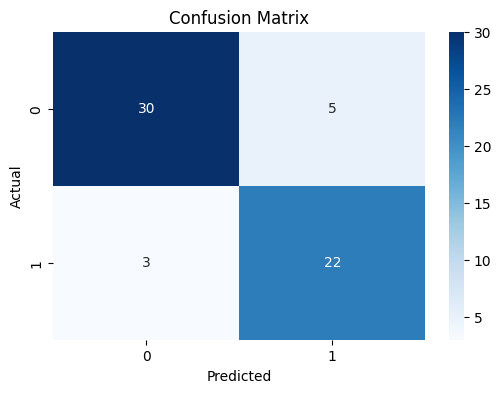

In [7]:
# Predict
y_pred = svm_model.predict(x_test)

#Evaluation
print("Classifcation Report")
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

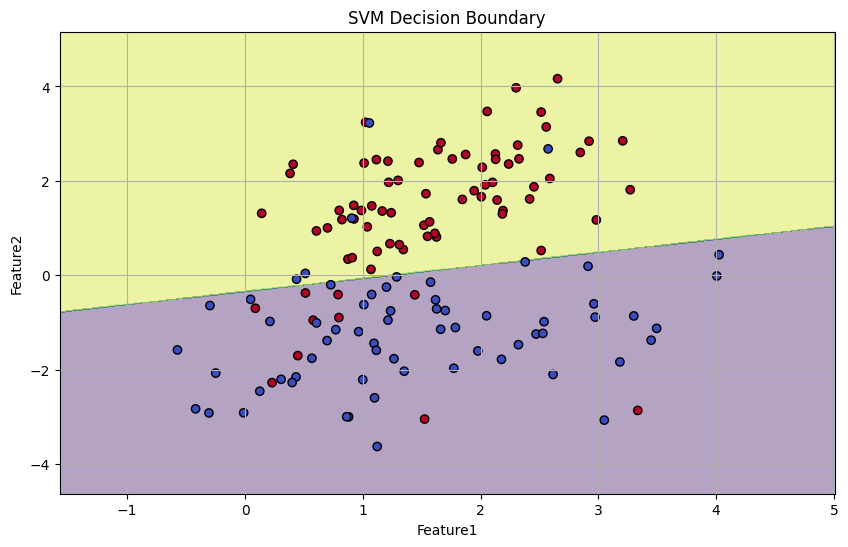

In [9]:
#Decision Boundary
def plot_decision_boundary(clf, x, y):
       h = .02
       x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
       y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
       xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
       z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
       z = z.reshape(xx.shape)
       plt.figure(figsize=(10, 6))
       plt.contourf(xx, yy, z, alpha=0.4)
       plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
       plt.title("SVM Decision Boundary")
       plt.xlabel("Feature1")
       plt.ylabel("Feature2")
       plt.grid(True)
       plt.show()

plot_decision_boundary(svm_model, x_train, y_train)